In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.ticker as plticker

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# Import data from CSV files. 
books = pd.read_csv('pl-books.csv')
speakers = pd.read_csv('pl-speakers.csv')
sections = pd.read_csv('pl-sections.csv')
smSections = pd.read_csv('pl-sections-sm.csv')

In [3]:
books = books.set_index('family').T
speakers = speakers.set_index('family').T
sections = sections.set_index('family').T
smSections = smSections.set_index('family').T

In [4]:
allBooks = pd.read_csv('pl-all-books.csv').set_index('family').T
allSections = pd.read_csv('pl-all-sections.csv').set_index('family').T
allSmSections = pd.read_csv('pl-all-sec-sm.csv').set_index('family').T
allSpeakers = pd.read_csv('pl-all-speakers.csv').set_index('family').T

In [25]:
def plotEtym(df, fam, allXticks=True, filename=None, kind="line"): 
    ax = df[fam].plot(kind=kind)
    if allXticks: 
        ax.set_xticks(range(len(df.index)))
        ax.set_xticklabels(df.index, rotation=90);
    ax.set_ylabel('%')
    if filename is not None: 
        fig = ax.get_figure()
        fig.tight_layout()
        fig.savefig(filename + '-' + fam.lower() + '.png') # save it to a file

In [6]:
books['Latinate'].sort_values(ascending=False)

book06    57.068409
book05    55.437759
book02    55.032652
book08    54.961288
book10    54.896266
book09    53.502919
book12    52.888889
book01    52.768390
book03    52.421110
book07    52.232855
book11    50.825688
book04    50.094894
Name: Latinate, dtype: float64

# Analyses of Language Families

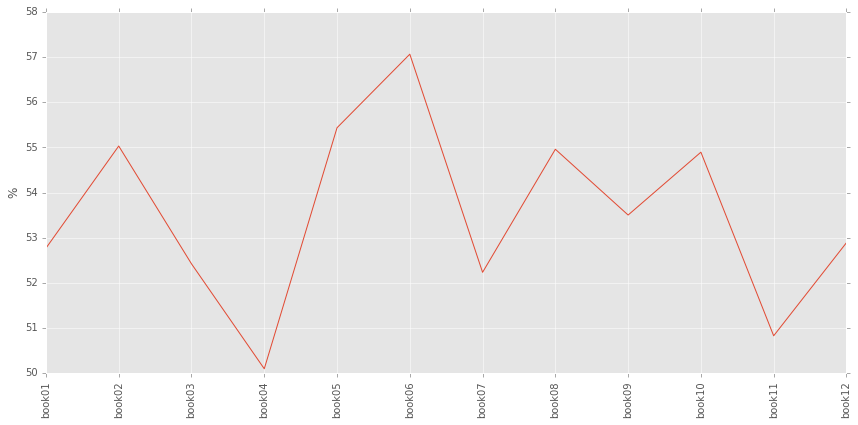

In [7]:
plotEtym(books, 'Latinate', filename="books")

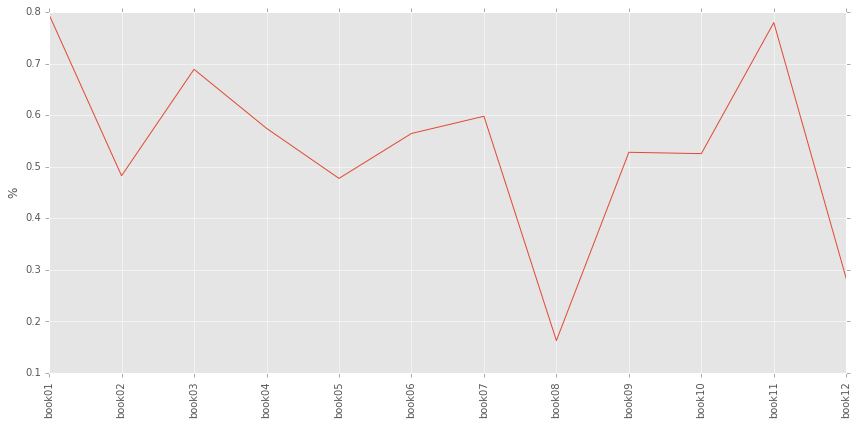

In [8]:
plotEtym(books, 'Hellenic', filename="books")

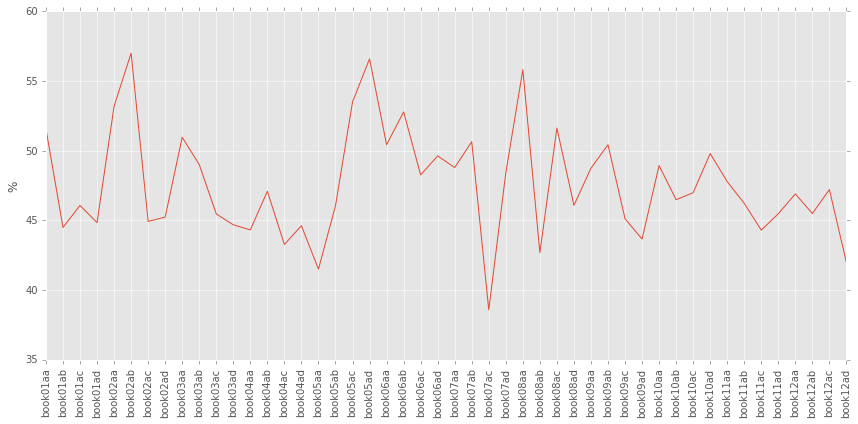

In [9]:
plotEtym(sections, 'Latinate', filename="sections")

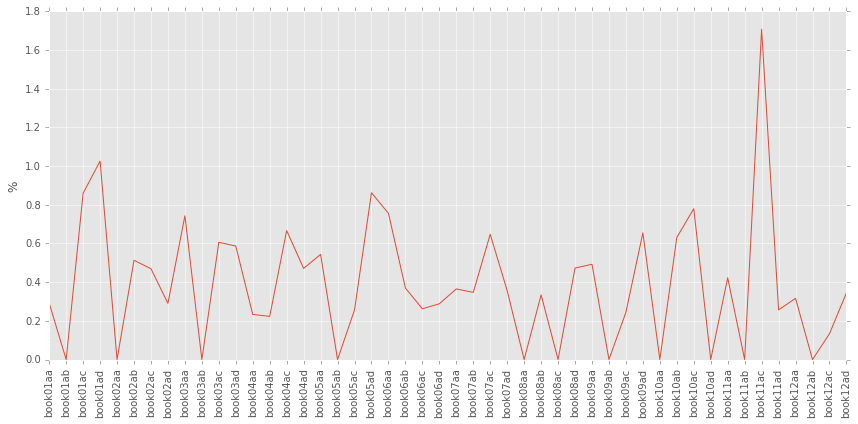

In [10]:
plotEtym(sections, 'Hellenic', filename="sections")

## By Subsection

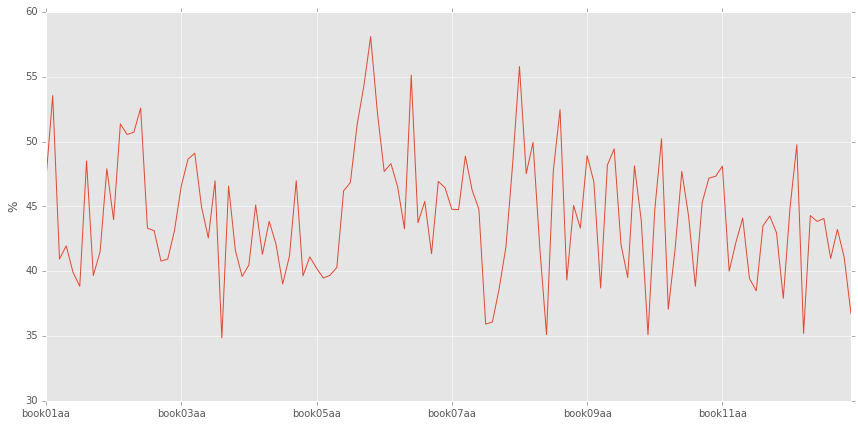

In [11]:
# Latinate, by subsection.
plotEtym(smSections, 'Latinate', allXticks=False, filename='subsections')

In [51]:
# Subsections with highest proportions of Latinate words
smSections['Latinate'].sort_values(ascending=False).head()

book05ai    58.093870
book08aa    55.785124
book06ae    55.117754
book05ah    54.298246
book01ab    53.544061
Name: Latinate, dtype: float64

In [116]:
# Subsections with lowest proportions of Latinate words
smSections['Latinate'].sort_values().head()

book03ag    34.848485
book09aj    35.097598
book08ae    35.101010
book12ac    35.201149
book07af    35.917313
Name: Latinate, dtype: float64

In [118]:
# Subsections with highest proportions of Hellenic words
smSections['Hellenic'].sort_values(ascending=False).head()

book11af    1.818182
book06ab    1.612903
book01ah    1.436782
book03aa    1.333333
book01af    1.282051
Name: Hellenic, dtype: float64

# By Speakers

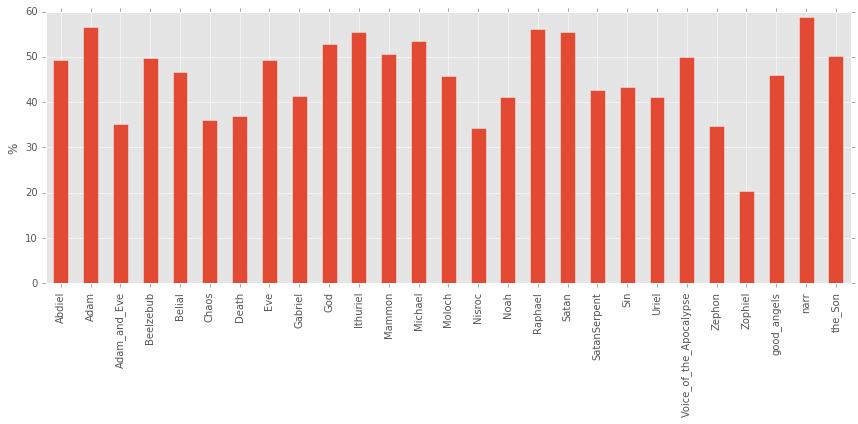

In [27]:
plotEtym(speakers, 'Latinate', kind='bar', filename="speakers")

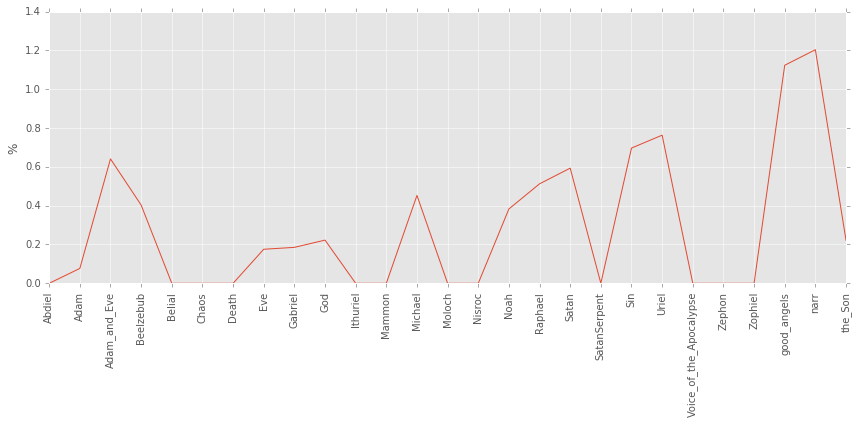

In [13]:
plotEtym(speakers, 'Hellenic', filename="speakers")

In [22]:
# Which of the main characters have the lowest Latinate scores? 
# Define a "main character" as one with > 2000 words. 
mainChars = ['narr', 'Adam', 'Eve', 'God', 'the_Son', 'Satan', 'Michael', 'Raphael']
mainSpeakers = speakers.loc[mainChars]
mainSpeakers['Latinate'].sort_values()

Eve        49.415205
the_Son    50.203252
God        52.851976
Michael    53.408062
Satan      55.391658
Raphael    56.069385
Adam       56.499233
narr       58.887891
Name: Latinate, dtype: float64

In [126]:
# Speakers with highest proportions of Latinate words
speakers['Latinate'].sort_values(ascending=False)[:20]

narr                       58.887891
Adam                       56.499233
Raphael                    56.069385
Ithuriel                   55.555556
Satan                      55.391658
Michael                    53.408062
God                        52.851976
Mammon                     50.550964
the_Son                    50.203252
Voice_of_the_Apocalypse    50.000000
Beelzebub                  49.798387
Eve                        49.415205
Abdiel                     49.320652
Belial                     46.651446
good_angels                46.067416
Moloch                     45.795796
Sin                        43.263647
SatanSerpent               42.750000
Gabriel                    41.342593
Noah                       41.251596
Name: Latinate, dtype: float64

In [124]:
# Speakers with lowest proportions of Latinate words
speakers['Latinate'].sort_values().head()

Zophiel         20.370370
Nisroc          34.188034
Zephon          34.782609
Adam_and_Eve    35.096154
Chaos           36.000000
Name: Latinate, dtype: float64

In [119]:
# Subsections with lowest proportions of Hellenic words
smSections['Hellenic'].sort_values().head()

book06aj    0.0
book09ab    0.0
book08ah    0.0
book08ag    0.0
book08af    0.0
Name: Hellenic, dtype: float64

# Analyses of All Languages

In [95]:
frenches = [col for col in list(allBooks) if col.startswith('French')]
frenches.append('Anglo-Norman')

In [96]:
frenches

['French',
 'French, Middle (ca. 1400-1600)',
 'French, Old (842-ca. 1400)',
 'Anglo-Norman']

In [97]:
allBooks['Varieties of French'] = allBooks[frenches].sum(axis=1)

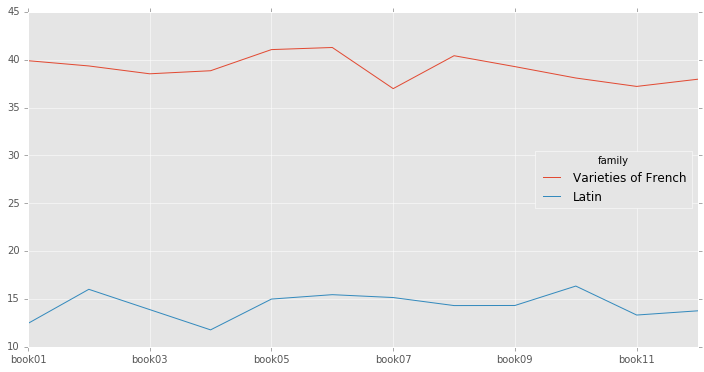

In [98]:
allBooks[['Varieties of French', 'Latin']].plot()

In [99]:
allSpeakers['Varieties of French'] = allSpeakers[frenches].sum(axis=1)

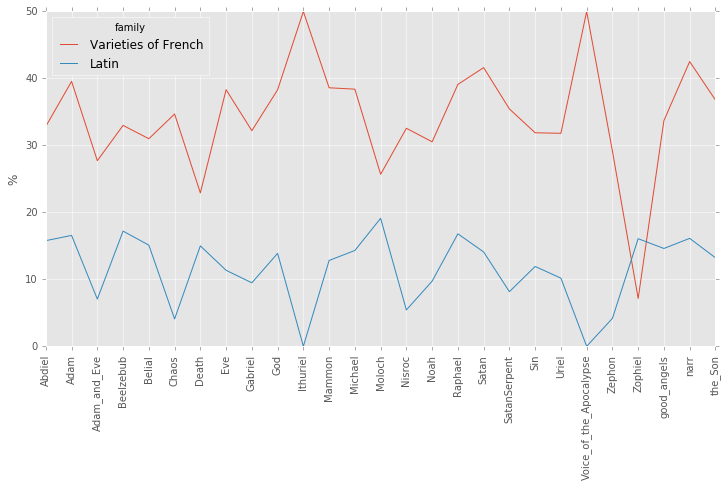

In [100]:
plotEtym(allSpeakers, ['Varieties of French', 'Latin'])

In [79]:
allSpeakers

family,Anglo-Norman,Angloromani,Arabic,Aragonese,Dutch,"Dutch, Middle (ca. 1050-1350)","Dutch, Old",English,"English, Old (ca. 450-1100)",French,...,Maori,"Norse, Old",Persian,Portuguese,Scots,Spanish,Tamil,Turkish,Welsh,Frenches
Abdiel,8.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.94,3.39,...,0.00,4.55,0.00,0.00,0.00,0.18,0.00,0.00,0.00,24.29
Adam,7.11,0.00,0.31,0.00,0.08,0.00,0.00,0.00,39.77,4.62,...,0.03,3.08,0.03,0.00,0.00,0.00,0.00,0.08,0.00,32.45
Adam_and_Eve,6.41,0.00,0.32,0.00,0.00,0.64,0.00,0.00,59.13,4.06,...,0.00,4.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.31
Beelzebub,6.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.27,3.13,...,0.00,4.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,26.46
Belial,5.14,0.00,0.00,0.23,0.00,0.23,0.00,0.00,48.13,3.66,...,0.00,5.14,0.16,0.00,0.00,0.00,0.00,0.00,0.00,25.86
Chaos,8.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.44,0.68,...,0.00,5.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.53
Death,2.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.08,5.83,...,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.69
Eve,6.13,0.00,0.27,0.00,0.00,0.09,0.00,0.00,46.42,2.84,...,0.00,2.76,0.06,0.00,0.00,0.00,0.00,0.18,0.00,32.19
Gabriel,4.95,0.00,0.27,0.00,0.55,0.00,0.00,0.00,50.50,2.06,...,0.00,6.23,0.00,0.14,0.00,0.00,0.00,0.00,0.00,27.25
God,7.58,0.00,0.17,0.00,0.00,0.00,0.00,0.00,43.44,3.46,...,0.00,3.29,0.06,0.00,0.00,0.17,0.00,0.00,0.08,30.73


In [106]:
# Speakers with highest proportions of Latin
allSpeakers['Latin'].sort_values(ascending=False).head()

Moloch       19.11
Beelzebub    17.20
Raphael      16.80
Adam         16.56
narr         16.12
Name: Latin, dtype: float64

In [108]:
# Speakers with lowest proportions of Latin
allSpeakers['Latin'].sort_values().head()

Ithuriel                   0.00
Voice_of_the_Apocalypse    0.00
Chaos                      4.08
Zephon                     4.17
Nisroc                     5.43
Name: Latin, dtype: float64

In [107]:
# Speakers with highest proportions of Frenches
allSpeakers['Varieties of French'].sort_values(ascending=False).head()

Voice_of_the_Apocalypse    50.00
Ithuriel                   50.00
narr                       42.52
Satan                      41.62
Adam                       39.56
Name: Varieties of French, dtype: float64

In [109]:
# Speakers with lowest proportions of Frenches
allSpeakers['Varieties of French'].sort_values().head()

Zophiel          7.14
Death           22.91
Moloch          25.69
Adam_and_Eve    27.72
Zephon          29.17
Name: Varieties of French, dtype: float64

In [101]:
allSmSections['Varieties of French'] = allSmSections[frenches].sum(axis=1)

In [112]:
# Subsections with highest proportions of Frenches
allSmSections['Varieties of French'].sort_values(ascending=False).head()

book08ag    44.72
book05ah    43.77
book06ae    42.33
book01ab    39.80
book02ae    39.40
Name: Varieties of French, dtype: float64

In [113]:
# Subsections with lowest proportions of Frenches
allSmSections['Varieties of French'].sort_values().head()

book07af    24.67
book09aj    25.03
book07ag    25.26
book10ag    26.31
book11ae    26.46
Name: Varieties of French, dtype: float64

In [114]:
# Subsections with highest proportions of Latin
allSmSections['Latin'].sort_values(ascending=False).head()

book08aa    19.07
book05ai    18.59
book05aj    18.10
book02ad    17.70
book02ab    17.09
Name: Latin, dtype: float64

In [115]:
# Subsections with lowest proportions of Latin
allSmSections['Latin'].sort_values().head()

book03ag    4.96
book09ag    5.59
book04aa    6.11
book08ae    6.11
book04ae    6.19
Name: Latin, dtype: float64

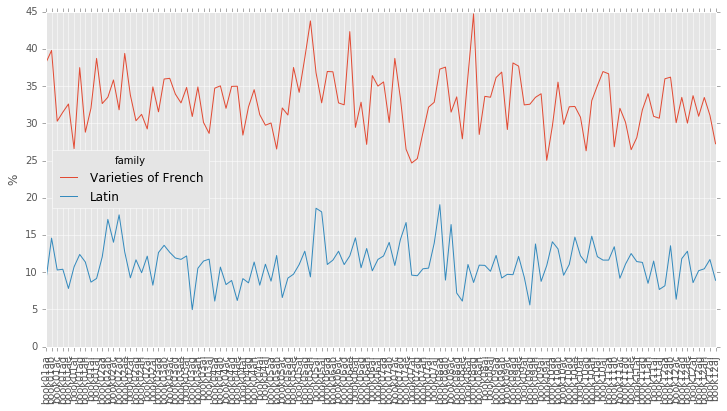

In [103]:
plotEtym(allSmSections, ['Varieties of French', 'Latin'])